# Propagation of Light Pulse in Dispersive Medium

Adapted From Chapter 10_Section 10.3.2_Optics by Ajoy Ghatak

\begin{equation}
E(z,t)=\frac{E_{0}}{\sqrt{1+ip}}e^{i\left(w_{0}t-k_{0}z\right)}exp\left[-\frac{(t-z/v_{g})^{2}}{\tau_{0}^{2}(1+ip)}\right]
\end{equation}


where $p=\frac{2\gamma z}{\tau_{0}^{2}}$ $\gamma=\frac{\lambda_{0}}{2\pi c^{2}}\left[\lambda_{0}^{2}\frac{d^{2}n}{d\lambda_{0}^{2}}\right]$ and $\frac{1}{v_{g}}=\frac{1}{c}\left[n(\lambda_{0})-\lambda_{0}\frac{dn}{d\lambda_{0}}\right]$


Corresponding Intensity Variation is given by,
\begin{equation}
I(z,t)=\frac{I_{0}}{\tau(z)/\tau_{0}}exp\left[-\frac{2(t-z/v_{g})^{2}}{\tau^{2}(z)}\right]
\end{equation}


where,
$\tau^{2}(z)=\tau_{0}^{2}(1+p^{2})$

Then we define the pulse broadening as,
\begin{equation}
\Delta\tau=\sqrt{\tau^{2}(z)-\tau_{0}^{2}} =|p|\tau_{0}=\frac{2|\gamma|z}{\tau_{0}}
\end{equation}


Hence final Pulse width will be,
\begin{equation}
\tau_{f}\approx\left[\tau_{0}^{2}+\Delta\tau^{2}\right]^{1/2}
\end{equation}

# Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [85]:
lamda0=0.8*10**-6    
t0=35*10**-15       
c=3*10**8
deltalamda=lamda0**2/(t0*2*np.pi*c)

noflamda=1.453
dnbydlamda=-0.017   #in micrometerinverse
dsnbydlamdas=0.040  #in micrometerinverse

groupvelocityinverse=1/c*(noflamda-(lamda0*10**6)*dnbydlamda)
gamma=(lamda0/(2*np.pi*c**2))*(lamda0*10**6)**2*dsnbydlamdas
z=10*10**-3  #in meter


deltat=-2*(gamma)*z/t0
tfinal=np.sqrt(t0**2+deltat**2)

print('gamma=',gamma,'s^2/m')
print('delta t =',deltat, 's')
print('final pulse width=',tfinal,'s')

gamma= 3.621659149468907e-26 s^2/m
delta t = -2.0695195139822323e-14 s
final pulse width= 4.06606825062655e-14 s


# Time Variation of the Intensity

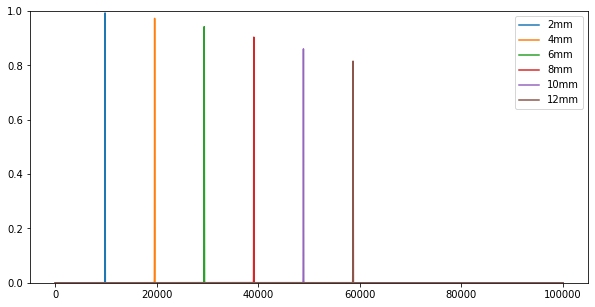

In [125]:
I0=1
def t(x):
    return t0*np.sqrt(1+(2*gamma*x/t0**2)**2)
def I(x,ty):
    return I0/(t(x)/t0)*np.exp(-2*(ty-x*groupvelocityinverse)**2/(t(x))**2)


Iy1=[]
Iy2=[]
Iy3=[]
Iy4=[]
Iy5=[]
Iy6=[]
xaxis=[]
x1=2*10**-3
x2=4*10**-3
x3=6*10**-3
x4=8*10**-3
x5=10*10**-3
x6=12*10**-3
for k in range(0,100000):
    y=k*10**-15
    xaxis.append(k)
    Iy1.append(I(x1,y))
    Iy2.append(I(x2,y))
    Iy3.append(I(x3,y))
    Iy4.append(I(x4,y))
    Iy5.append(I(x5,y))
    Iy6.append(I(x6,y))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(xaxis,Iy1,label='2mm')
plt.plot(xaxis,Iy2,label='4mm')
plt.plot(xaxis,Iy3,label='6mm')
plt.plot(xaxis,Iy4,label='8mm')
plt.plot(xaxis,Iy5,label='10mm')
plt.plot(xaxis,Iy6,label='12mm')
plt.ylim(0,1)
plt.legend()
plt.show()


In [ ]:
x1axis=[]
x2axis=[]
x3axis=[]
x4axis=[]
x5axis=[]
x6axis=[]
for i in xaxis:
    x1axis.append(i-Iy1.index(max(Iy1)))
    x2axis.append(i-Iy2.index(max(Iy2)))
    x3axis.append(i-Iy3.index(max(Iy3)))
    x4axis.append(i-Iy4.index(max(Iy4)))
    x5axis.append(i-Iy5.index(max(Iy5)))
    x6axis.append(i-Iy6.index(max(Iy6)))
    
plt.plot(x1axis,Iy1,label='2mm')
plt.plot(x2axis,Iy2,label='4mm')
plt.plot(x3axis,Iy3,label='6mm')
plt.plot(x4axis,Iy4,label='8mm')
plt.plot(x5axis,Iy5,label='10mm')
plt.plot(x6axis,Iy6,label='12mm')
plt.ylim(0,1)
plt.xlim(-100,100)
plt.show()